## Bloch sphere for Qibo

This is a tutorial to learn how to use the Bloch sphere implemented in `qibo`!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

from qibo import Circuit, gates
from qibo.ui.bloch import Bloch

First of all, let's `plot` an empty Bloch sphere.

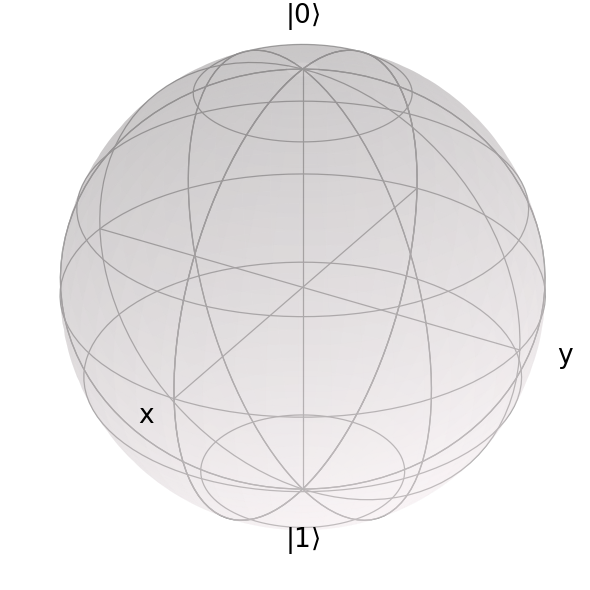

In [2]:
bs = Bloch()
bs.render()
plt.show()

Maybe the sphere is slightly too big: let's change its size.

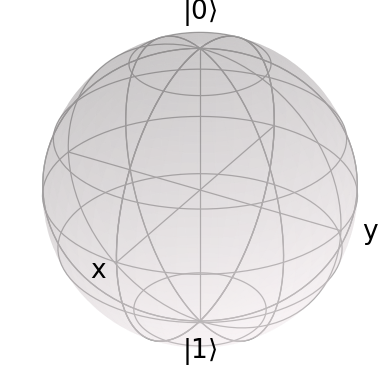

In [3]:
STYLE = {
    "figure.figsize": (4, 4),
    "lines.linewidth": 0.9}

bs = Bloch(STYLE=STYLE)
bs.render()
plt.show()

It is possible to add vectors to the sphere with two functions: 

(1) `add_state`: this function allows to add to the sphere the output of a Qibo circuit; \
(2) `add_vector`: this function allows to add to the sphere a vector with three components x, y, z such that x^2 + y^2 + z^2 = 1;

For both functions it is possible to specify:

a. the desired `color`; \
b. the representation `mode`, which can be either `point` or `vector`.

Let's see these two functions in action.

[Qibo 0.2.19|INFO|2025-09-22 22:18:27]: Using qibojit (numba) backend on /CPU:0


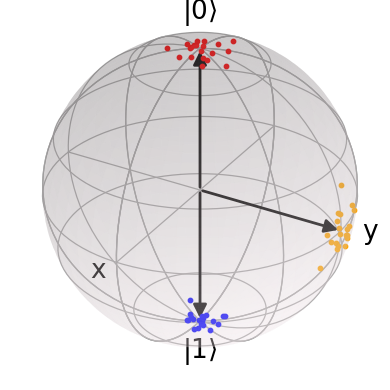

In [4]:
bs.add_state(np.array([1, 0]), color="black")
bs.add_state(np.array([0, 1]), color="black")
bs.add_vector(np.array([0, 1, 0]), color="black")

def _circuit():
    circ = Circuit(1)
    circ.add(gates.RY(q=0, theta=np.random.randn() * 0.1))
    circ.add(gates.RX(q=0, theta=np.random.randn() * 0.1))
    circ.add(gates.RZ(q=0, theta=np.random.randn() * 0.1))
    return circ

for i in range(20):
    state = _circuit()(np.array([1, 0], dtype="complex")).state()
    bs.add_state(state, mode="point", color="red")

for i in range(20):
    circ = _circuit()
    circ.add(gates.RX(q=0, theta=-np.pi / 2))
    bs.add_state(circ().state(), mode="point", color="orange")

for i in range(20):
    circ = _circuit()
    state = circ(np.array([0, 1], dtype="complex")).state()
    bs.add_state(state, mode="point", color="blue")

bs.render()
plt.show()